<a href="https://colab.research.google.com/github/AbdurRazzaq24/Tensorflow-ML1/blob/main/arneuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset, dataset included in keras

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape #60,000 images and each has length of 28 pixels and width of 28 pixels

(60000, 28, 28)

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [ ]:
train_images[10000,20,20] #[index number of the 60,000 images, pixel row number, pixel column number]

0

In [ ]:
train_images[45,2,3]

1

Pixel numbers are between 0(black) and 255(white) so the image is in greyscale

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #array of label names

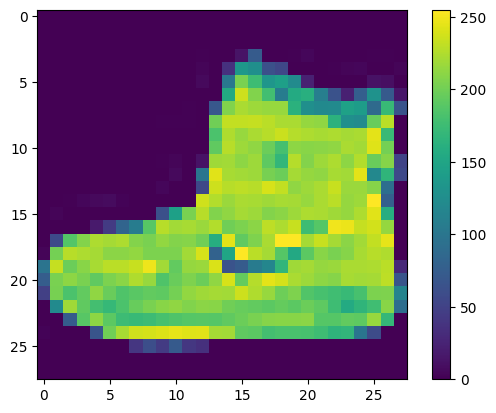

In [ ]:
plt.figure() #creates a new figure for visualizations #matplotlib.pyplot is plt used for visualizations
plt.imshow(train_images[0]) #display the image
plt.colorbar() #display the colorbar 0-250 here
plt.grid(False) #display the gridlines if necessary
plt.show() #renders the final the image with all the additions like the above functions

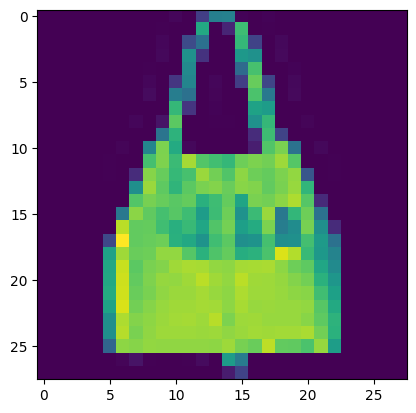

In [ ]:

plt.imshow(train_images[59000])


In [ ]:
#get smaller values of pixels for easier calculations
train_images = train_images / 255.0
test_images = test_images / 255.0

Build the model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2) only one hidden layer, "relu" rectified linear unit
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

So, in summary, this code defines a simple feedforward neural network with an input layer that flattens the input image, one hidden layer with 128 ReLU neurons, and an output layer with 10 neurons and softmax activation for multiclass classification. This is a basic neural network architecture often used for tasks like image classification.

Now compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [ ]:
model.fit(train_images, train_labels, epochs=10) #epochs is the number of times the entire dataset is passed to the neural network forward and backward during training

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4991 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3745 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3363 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2689 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2572 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2474 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
#verbose is a parameter that controls the amount of output to be displayed
print('Test accuracy:', test_acc)

Making predictions

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

In [ ]:
predictions[1000]

In [ ]:
np.argmax(predictions[1000])


In [ ]:
test_labels[100]

Verfiying predictions

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
